# Exercise 7  - Odin Kvarving

# Tasks

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).

* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).

* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [232]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("data/agaricus-lepiota.data")
mushrooms = pd.get_dummies(data)
data.head()


,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [233]:
from sklearn.preprocessing import LabelEncoder

# Transfrom binary categories to either 0 or 1:
labelencoder=LabelEncoder()
for col in data.columns:
    if len(data[col].value_counts())==2:
        
        data[col]=labelencoder.fit_transform(data[col])
    
data.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,1,p,1,0,1,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,1,a,1,0,0,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,1,l,1,0,0,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,1,p,1,0,1,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,0,n,1,1,0,k,...,s,w,w,p,w,o,e,n,a,g


In [234]:
# X is all categories except 'edibility' 
X = mushrooms.drop(['edibility_e', 'edibility_p'], axis=1)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [235]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.cluster import KMeans

result = []
for i in range(2, 31):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(mushrooms)
    result.append(metrics.silhouette_score(mushrooms, kmeans.labels_, metric='euclidean'))

print("Metrics-silhouette-score per n_clusters: ")
for i in result:
    print(i, end = ' ')



Metrics-silhouette-score per n_clusters: 
0.1803249719513766 0.22832286773950566 0.23008597066260447 0.2602123143919128 0.27714303250943756 0.28732615786759597 0.30095930291816125 0.2519492536240282 0.24479604514559394 0.2596024732132158 0.20693032450708218 0.16523094220881235 0.1643003052024789 0.16971674401405798 0.16364276183395407 0.17094635570132619 0.1697125381988096 0.1701739673429868 0.1819009071362336 0.14078635898410852 0.15049574692812803 0.1544889020700776 0.17679036755085253 0.15662534825229898 0.16237200355383058 0.15872119495788833 0.15371284109279248 0.15598016777072857 0.1506198937220072 

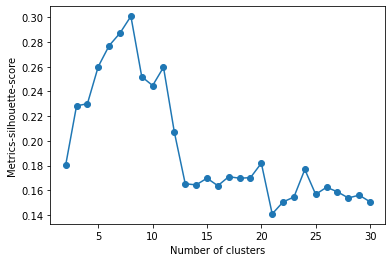

In [236]:
plt.figure()
plt.plot(range(2,31), result, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Metrics-silhouette-score")
plt.show()

In [237]:
index = np.argmax(result)

for i in range(2,31):
    clusters = index + 2

print("Metrics-silhouette-score:", result[index])
print("Optimal number of clusters:", clusters)

Metrics-silhouette-score: 0.30095930291816125
Optimal number of clusters: 8


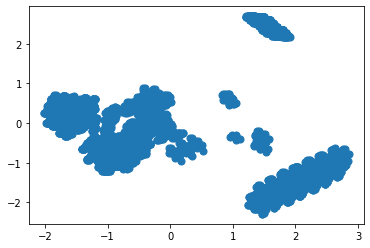

In [238]:
from sklearn.decomposition import PCA
pca = PCA(2)

df = pca.fit_transform(mushrooms)

kmeans = KMeans(n_clusters=clusters)

plt.scatter(df[:, 0], df[:, 1], s=50);

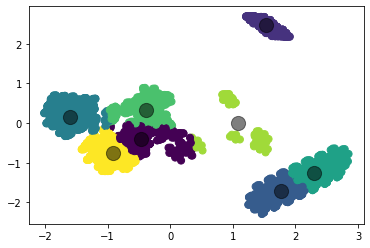

In [239]:
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

plt.scatter(df[:, 0], df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);